In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

2022-10-01 23:47:27.250731: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-01 23:47:30.324280: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-01 23:47:30.324349: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-01 23:47:39.883290: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
image, label= tfds.as_numpy(tfds.load('mnist', split='train', shuffle_files= True, batch_size=-1, as_supervised=True))

2022-10-01 23:47:52.435898: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-01 23:47:52.436875: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-01 23:47:52.436961: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Bo): /proc/driver/nvidia/version does not exist
2022-10-01 23:47:52.440087: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [40]:
label['index'] = label.index
count = label.groupby('Label').agg({'index':'count'})
count

,index
Label,
0,5923
1,6742
2,5958
3,6131
4,5842
5,5421
6,5918
7,6265
8,5851


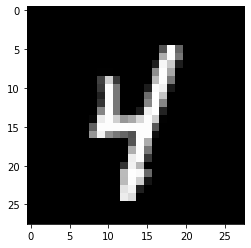

In [4]:
plt.imshow(image[0],cmap='gray')
plt.show()

2022-10-01 23:47:58.967316: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


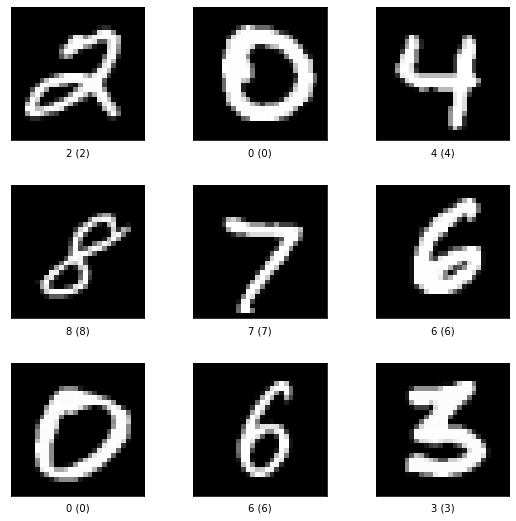

In [5]:
ds, info = tfds.load('mnist', split='test', with_info=True)

fig = tfds.show_examples(ds, info)

In [6]:
pixels = image.flatten().reshape(amount, width*height*lenght)
pixels.shape

(60000, 784)

In [7]:
label = label.reshape(amount, 1)
label.shape

(60000, 1)

In [8]:
pixels = pd.DataFrame(pixels)
pixels.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
label = pd.DataFrame(label)
label.columns = ['Label']
label.head()

,Label
0,4
1,1
2,0
3,7
4,8


In [10]:
df = pd.concat([pixels, label], axis = 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


# LogisticRegression khong su dung PCA, khong scale data

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(pixels, label)



/home/nhanvu10092001/anaconda3/envs/Bo/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nhanvu10092001/anaconda3/envs/Bo/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
test_image, test_label = tfds.as_numpy(tfds.load('mnist', split = 'test', shuffle_files= True, batch_size=-1, as_supervised=True))

test_amount, test_width, test_height, test_length = test_image.shape
test_pixels = test_image.flatten().reshape(test_amount, test_width*test_height*test_length)
test_pixels.shape

(10000, 784)

In [46]:
test_label = pd.DataFrame(test_label)
test_label.head()

,0
0,2
1,0
2,4
3,8
4,7


In [44]:
test_label['index'] = test_label.index
test_count = test_label.groupby('Label').agg({'index':'count'})
test_count

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [13]:
predict = clf.predict(test_pixels)

In [14]:
predict

array([2, 0, 4, ..., 8, 0, 5])

In [15]:
test_label

array([2, 0, 4, ..., 8, 0, 5])

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(predict, test_label)

0.9255

# LogisticRegression Scale data

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


scaler_1 = MinMaxScaler().fit(pixels)
scaler_2 = StandardScaler().fit(pixels)


In [18]:
data_minmax_scaler = scaler_1.transform(pixels)
data_standard_scaler = scaler_2.transform(pixels)

In [19]:
reg_1 = LogisticRegression(random_state=0).fit(data_minmax_scaler, label)
reg_2 = LogisticRegression(random_state=0).fit(data_standard_scaler, label)

/home/nhanvu10092001/anaconda3/envs/Bo/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nhanvu10092001/anaconda3/envs/Bo/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/nhanvu10092001/anaconda3/envs/Bo/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [20]:
test_minmax_scaler = scaler_1.transform(test_pixels)
test_standard_scaler = scaler_2.transform(test_pixels)

predict_1 = reg_1.predict(test_minmax_scaler)
predict_2 = reg_2.predict(test_standard_scaler)

# LogicticRegression PCA

In [21]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

pca = PCA(n_components=0.95, svd_solver='full')
pca.fit(pixels)

data_PCA = pca.transform(pixels)

# kernel_pca = KernelPCA(n_components=500, kernel='linear')
# kernel_pca.fit(pixels.head(10000))

# data_kernel_PCA = kernel_pca.transform(pixels)

In [22]:
reg_3 = LogisticRegression(random_state=0).fit(data_PCA, label)
# reg_4 =LogisticRegression(random_state=0).fit(data_kernel_PCA, label)

/home/nhanvu10092001/anaconda3/envs/Bo/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nhanvu10092001/anaconda3/envs/Bo/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
test_pca = pca.transform(test_pixels)
# test_kernel_pca = pca.transform(test_pixels)

predict_3 = reg_3.predict(test_pca)
# predict_4 = reg_4.predict(test_kernel_pca)

# Scale data ket hop voi PCA

In [25]:
scaler_5 = MinMaxScaler().fit(data_PCA)
scaler_6 = StandardScaler().fit(data_PCA)

# scaler_7 = MinMaxScaler().fit(data_kernel_PCA)
# scaler_8 = StandardScaler().fit(data_kernel_PCA)


data_MM_PCA = scaler_5.transform(data_PCA)
# data_MM_KPCA = scaler_7.transform(data_kernel_PCA)

data_SS_PCA = scaler_6.transform(data_PCA)
# data_SS_KPCA = scaler_8.transform(data_kernel_PCA)

In [26]:
reg_5 = LogisticRegression(random_state=0).fit(data_MM_PCA, label)
reg_6 = LogisticRegression(random_state=0).fit(data_SS_PCA, label)
# reg_7 = LogisticRegression(random_state=0).fit(data_MM_KPCA, label)
# reg_8 = LogisticRegression(random_state=0).fit(data_SS_KPCA, label)

/home/nhanvu10092001/anaconda3/envs/Bo/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nhanvu10092001/anaconda3/envs/Bo/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/nhanvu10092001/anaconda3/envs/Bo/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [27]:
test_MM_PCA = scaler_5.transform(test_pca)
test_SS_PCA = scaler_6.transform(test_pca)

# test_MM_KPCA = scaler_7.transform(test_kernel_pca) 
# test_SS_KPCA = scaler_8.transform(test_kernel_pca)

predict_5 = reg_5.predict(test_MM_PCA)
predict_6 = reg_6.predict(test_SS_PCA)
# predict_7 = reg_7.predict(test_MM_KPCA)
# predict_8 = reg_8.predict(test_SS_KPCA)

In [28]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(test_label, predict)
MSE_1 = mean_squared_error(test_label, predict_1)
MSE_2 = mean_squared_error(test_label, predict_2)
MSE_3 = mean_squared_error(test_label, predict_3)
MSE_5 = mean_squared_error(test_label, predict_5)
MSE_6 = mean_squared_error(test_label, predict_6)

In [29]:
print([MSE, MSE_1, MSE_2, MSE_3, MSE_5, MSE_6])

[1.2852, 1.3228, 1.2483, 1.4361, 1.3947, 1.3475]


In [47]:
from joblib import dump, load
dump(clf, 'model.joblib')
dump(reg_1, 'model_1.joblib')
dump(reg_2, 'model_2.joblib')
dump(reg_3, 'model_3.joblib')
dump(reg_5, 'model_5.joblib')
dump(reg_6, 'model_6.joblib')


['model_6.joblib']

In [ ]:
predict.tofile('predict.csv', sep = '\n')
predict_1.tofile('predict_1.csv', sep = '\n')
predict_2.tofile('predict_2.csv', sep = '\n')
predict_3.tofile('predict_3.csv', sep = '\n')
predict_5.tofile('predict_5.csv', sep = '\n')
predict_6.tofile('predict_6.csv', sep = '\n')